<a href="https://colab.research.google.com/github/shahchayan9/Dimensionality-Reduction/blob/main/MultiDimensionalScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Multidimensional Scaling?

**Multidimensional Scaling (MDS)** is a non-linear technique for embedding data in a lower-dimensional space.

It maps points residing in a higher-dimensional space to a lower-dimensional space while preserving the distances between those points as much as possible. Because of this, the pairwise distances between points in the lower-dimensional space are matched closely to their actual distances.

The following figure is an example of a possible mapping of points from 3D to 2D and 1D space. The pairwise distances of the three points in 3D space are exactly preserved in the 2D space but not in the 1D space. If we run MDS, it would ensure a minimal difference between the actual pairwise distances and the pairwise distances of the mapped points:
![alt](https://s3.stackabuse.com/media/articles/guide-to-multidimensional-scaling-in-python-with-scikit-learn-0.png)

### Multidimensional Scaling (MDS) Overview

MDS can be used as a preprocessing step for dimensionality reduction in classification and regression problems.

Other than Multidimensional Scaling, you can also use other dimensionality reduction techniques, such as **Principal Component Analysis (PCA)** or **Singular Value Decomposition (SVD)**. If you'd like to read about both of them, as well as how to use them to your advantage, explore a **Guide to Dimensionality Reduction in Python with Scikit-Learn**!

MDS is not only an effective technique for dimensionality reduction but also for **data visualization**. It maintains the same clusters and patterns of high-dimensional data in the lower-dimensional space, allowing you to boil down, say, a 5-dimensional dataset to a 3-dimensional dataset, which can be interpreted much more easily and naturally.

Normally, the distance measure used in MDS is the **Euclidean distance**; however, any other suitable dissimilarity metric can be applied.

### Types of Multidimensional Scaling
There are two main ways to implement MDS:

1. **Metric MDS / Classical MDS**: Aims to preserve the pairwise distance/dissimilarity measure as much as possible.
2. **Non-Metric MDS**: Applicable when only the ranks of a dissimilarity metric are known. MDS then maps the objects so that the ranks are preserved as much as possible.

### Performing Multidimensional Scaling in Python with Scikit-Learn

The Scikit-Learn library's `sklearn.manifold` module implements manifold learning and data embedding techniques. We'll use the `MDS` class from this module. The embeddings are determined using the **Stress Minimization using Majorization (SMACOF)** algorithm.

#### Key Parameters for MDS
- **`n_components`**: Number of dimensions to map the points to. Default is `2`.
- **`metric`**: A Boolean variable with a default value of `True` for metric MDS and `False` for its non-metric version.
- **`dissimilarity`**: Default is `euclidean`, which specifies Euclidean pairwise distances. Another option is `precomputed`, which requires precomputing the pairwise distance matrix and passing it as input to the `fit()` or `fit_transform()` function.

#### MDS Object Attributes
1. **`embedding_`**: Location of points in the new space.
2. **`stress_`**: Goodness-of-fit statistic used in MDS.
3. **`dissimilarity_matrix_`**: The matrix of pairwise distances/dissimilarity.
4. **`n_iter_`**: Number of iterations for the best goodness-of-fit measure.

Like other dimensionality reduction classes in Scikit-Learn, the `MDS` class implements the `fit()` and `fit_transform()` methods.

---

### A Simple Illustration

Below, we demonstrate how to apply MDS using a simple example. First, we'll include the necessary imports:



In [ ]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

The code below sets up an MDS object and calls its method fit_transform(). This method returns the embedded points in 2D space. Let's print the resulting mapping:

In [ ]:
X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [0, 1, 1]])
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[ 0.72521687  0.52943352]
 [ 0.61640884 -0.48411805]
 [-0.9113603  -0.47905115]
 [-0.2190564   0.71505714]
 [-0.21120901 -0.28132146]]


Since the embeddings are created based on the stress minimization algorithm, we can also take a look at the stress variable:

In [ ]:
stress = mds.stress_
print(stress)

0.18216844548575456


Another method of applying MDS is by constructing a distance matrix and applying MDS directly to this matrix as shown in the code below. This method is useful when a distance measure other than Euclidean distance is required. The code below computes the pairwise **Manhattan distances** (also called the city block distance or L1 distance) and transforms the data via MDS.

Note the dissimilarity argument has been set to precomputed:

In [ ]:
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

Though, this doesn't help us gain a good intuition as to what just happened. Humans aren't that good at crunching numbers. To gain a better understanding of the entire process, let's plot the original points and their embeddings created by preserving Euclidean distances. An original point and its corresponding embedded point are both shown in the same color:

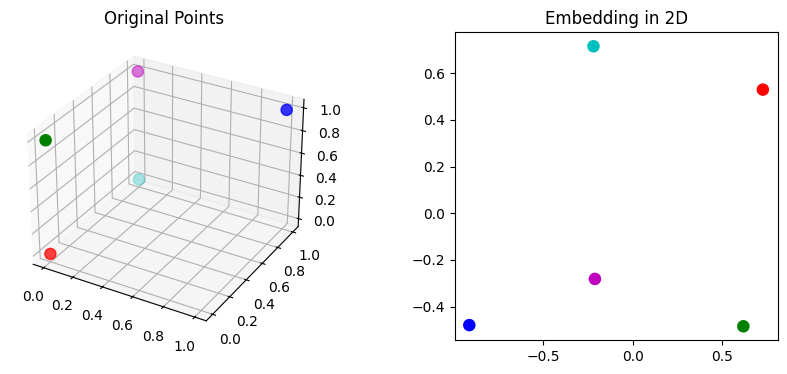

In [ ]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

### Multidimensional Scaling: Relative Distances in Visualization

The plot on the right maintains the relative distances generally intact. For instance, the **purple**, **green**, and **blue** points are close together, and their relative positions to one another remain approximately the same when compared to **cyan** and **red**.

---

### Practical Multidimensional Scaling on the Olivetti Faces Dataset from AT&T

As a practical illustration of MDS, we'll use the **Olivetti faces dataset** from AT&T to visualize embeddings in a 2D space. This dataset includes **10 64x64 bitmap images per person**, each image taken with varying facial expressions or lighting conditions.

MDS effectively preserves the patterns in the data, ensuring that different face images of the same person are close to each other in the 2D space and far from the mapped images of other individuals.

To simplify the visualization and avoid clutter, we'll use the faces of **4 distinct individuals** and apply MDS to these.

---

### Implementing MDS with a Custom Function: `mapData()`

Before fetching the dataset and applying MDS, let's create a helper function, **`mapData()`**. This function will:

1. Take the following input arguments:
   - **`dist_matrix`**: Pairwise distance matrix.
   - **`X`**: Raw data matrix.
   - **`y`**: Class labels for the data points.
   - **`metric`**: Boolean for metric or non-metric MDS.
   - **`title`**: Title for the graph.

2. Apply MDS to the distance matrix and display:
   - The transformed points in 2D space, with points of the same color indicating images of the same person.
   - The images of each face overlaid on the 2D space where they are mapped.

We'll also demonstrate MDS using different distance measures along with **non-metric MDS**.

---

### Code Example

Below is the setup for our implementation:


In [ ]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])

    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)
    plt.show()

The code below fetches the Olivetti faces dataset and extracts examples with labels < 4:

In [ ]:
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


And without further ado, let's load the data in and run our mapData() function on it!

## Using the Euclidean Pairwise Distances
The mapping of the Olivetti faces dataset using Euclidean distances is shown below. Euclidean distance is the default distance for MDS because of how versatile and commonly used it is:

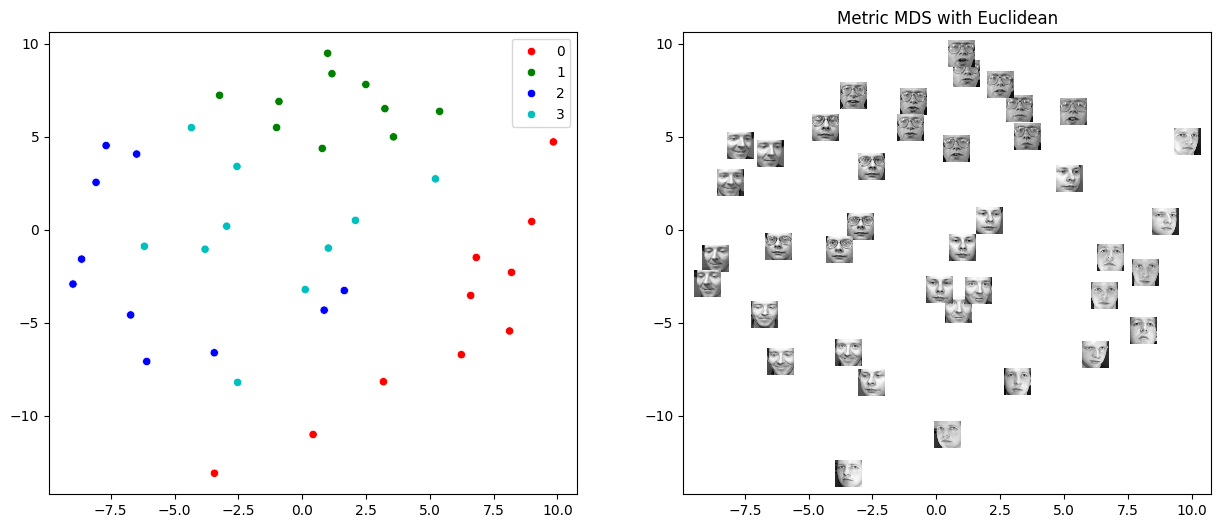

In [ ]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True,
        'Metric MDS with Euclidean')

We can see a nice mapping of 64x64 images to a two-dimensional space, where the class of each image is well separated from the rest in most cases. It's worth taking a moment to appreciate the fact that images residing in a 64x64 dimension space can be reduced to a two dimensional space, and still retain their informational value.

# Using the Manhattan Pairwise Distances
For comparison, we can perform MDS on the same data using the Manhattan pairwise distances. The code below uses the Manhattan distance matrix as an input to mapData():

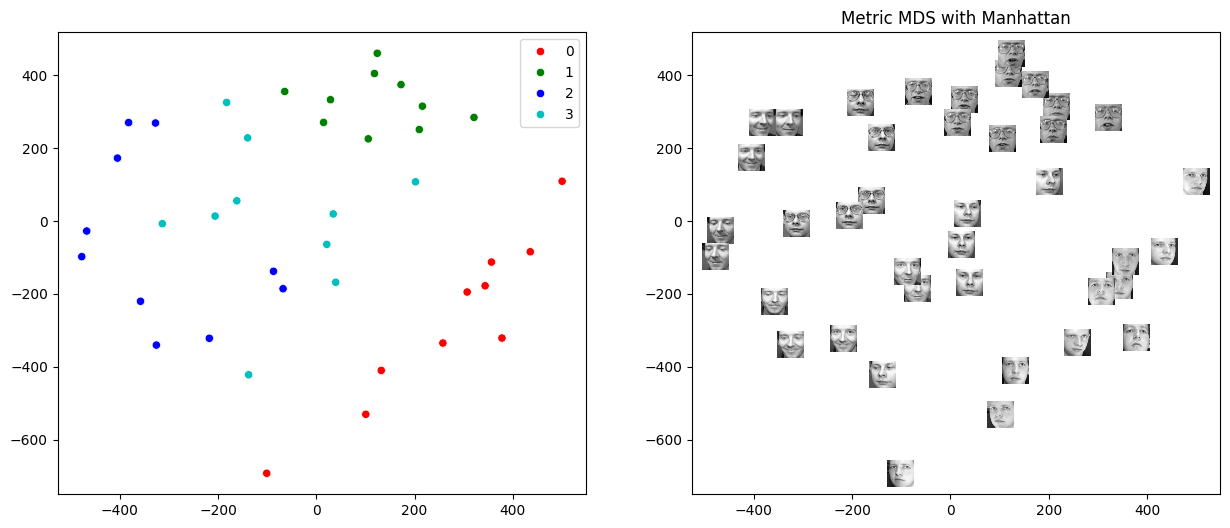

In [ ]:
dist_L1 = manhattan_distances(X_faces)
mapData(dist_L1, X_faces, y_faces, True,
        'Metric MDS with Manhattan')

We can see the mapping is quite similar to the one obtained via Euclidean distances. Each class is nicely separated in the lower-dimensional space, though they're offset a bit differently on the plot.

# Performing Non-Metric Multidimensional Scaling
As a final example, we'll show non-metric MDS on the same dataset using Euclidean distances and see how it compares with the corresponding metric version:

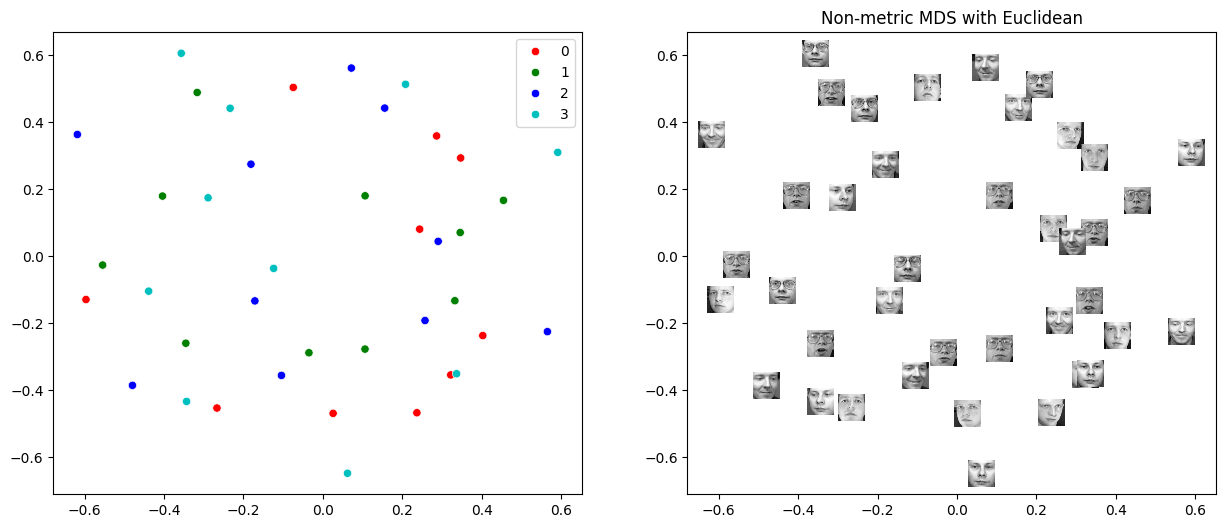

In [ ]:
mapData(dist_euclid, X_faces, y_faces, False,
        'Non-metric MDS with Euclidean')

There are quite a lot of hiccups here. We can see that this version of MDS does not perform so well on the Olivetti faces dataset.

This is mainly because of the quantitative nature of data.

Non-metric MDS maintains the ranked distances between objects rather than the actual distances.

# The n_components Parameter in MDS
One of the important hyper-parameters involved in MDS is the size of the lower-dimensional space in which the points are embedded.

This would be very relevant when MDS is used as a preprocessing step for dimensionality reduction.

# The question arises:

### Just how many dimensions do you pick, so that you reduce the dimensionality the most you can, without losing important information?

A simple method to choose a value of this parameter is to run MDS on different values of n_components and plot the stress_ value for each embedding. Given that the stress_ value decreases with higher dimensions - you pick a point that has a fair tradeoff between stress_ and n_components.

The code below runs MDS by varying the dimensions from 1-20 and plots the corresponding stress_ attribute for each embedding:

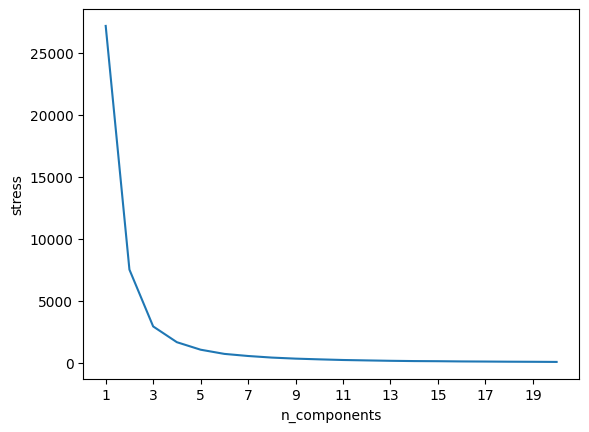

In [ ]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

---

### Evaluating Stress vs. Dimensions

We can observe that increasing the value of **`n_components`** initially decreases the stress value significantly, but the curve levels off as the dimensions increase.

For example:
- There's almost no difference between **18 and 19 dimensions**.
- There's a significant reduction in stress between **1 and 2 dimensions**.

The **elbow of the curve** is typically a good choice for the optimal value of `n_components`. In this case, the optimal value is **4**, which represents an amazing **0.09% reduction of features/attributes**!

---

# Conclusions

This guide provided an introduction to **Multidimensional Scaling (MDS)** in Python using **Scikit-Learn**. Here's a summary of what we covered:
- **How Multidimensional Scaling works.**
- Key **hyperparameters** and **variations** of MDS.
- A practical application using the **Olivetti Faces dataset** from AT&T.

Through this, we demonstrated that:
- Images residing in a **64x64 dimensional space** can be mapped to a **two-dimensional space**.
- Even with such dimensionality reduction, **patterns and clusters** in the data are preserved, allowing for effective visualization and interpretation.


